In [78]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [79]:
path = os.getcwd()
os.listdir()

['.anaconda',
 '.android',
 '.conda',
 '.condarc',
 '.continuum',
 '.dotnet',
 '.Icecream Screen Recorder',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.matplotlib',
 '.ms-ad',
 '.nbi',
 '.nuget',
 '.spyder-py3',
 '.vscode',
 '05-RecommendationSystem.ipynb',
 '08_shahnameh-text-generation-language-model.ipynb',
 '09-imbalance1(base-line).ipynb',
 '10-simple-audio-classification.ipynb',
 '14-license-plate-recognition (1).ipynb',
 '15-captcha_ocr.ipynb',
 '16-text_generation.ipynb',
 '1HmOlao4361',
 '3D Objects',
 '6-persian-topics',
 '6-persian-topics.zip',
 'anaconda3',
 'ansel',
 'AppData',
 'Application Data',
 'archive (3)',
 'archive (3).zip',
 'bazyabi.ipynb',
 'bazyabi2.ipynb',
 'build_model_mini.ipynb',
 'CamScanner 05-25-2024 10.56.zip',
 'captcha_ocr.ipynb',
 'cell.jpg',
 'cell5.jpg',
 'cell_0.jpg',
 'Contacts',
 'Cookies',
 'creditcard.csv',
 'cropped_table.jpg',
 'ctc_handwritten.ipynb',
 'ctc_plate.ipynb',
 'ctc_plate2.ipynb',
 'ctc_project.ipy

In [80]:
DATASET_PATH = 'Train/Train'

data_dir = pathlib.Path(DATASET_PATH)

In [5]:
import os
import shutil

# Set the root directory containing the audio files
root_dir = 'Train/Train'

# Define the directory names
directory_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

# Create the directories if they don't exist
for dir_name in directory_names:
    dir_path = os.path.join(root_dir, dir_name)
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

# Move the audio files to their respective directories
for filename in os.listdir(root_dir):
    if filename.endswith('.wav'):
        first_digit = int(filename[0])
        src_path = os.path.join(root_dir, filename)
        dst_path = os.path.join(root_dir, directory_names[first_digit], filename)
        shutil.move(src_path, dst_path)
        print(f"Moved {filename} to directory {directory_names[first_digit]}")


Moved 0_1.wav to directory zero
Moved 0_10509.wav to directory zero
Moved 0_10510.wav to directory zero
Moved 0_10511.wav to directory zero
Moved 0_10512.wav to directory zero
Moved 0_10513.wav to directory zero
Moved 0_10514.wav to directory zero
Moved 0_10515.wav to directory zero
Moved 0_10579.wav to directory zero
Moved 0_10580.wav to directory zero
Moved 0_10581.wav to directory zero
Moved 0_10582.wav to directory zero
Moved 0_10583.wav to directory zero
Moved 0_10584.wav to directory zero
Moved 0_10585.wav to directory zero
Moved 0_10586.wav to directory zero
Moved 0_10587.wav to directory zero
Moved 0_10588.wav to directory zero
Moved 0_10589.wav to directory zero
Moved 0_10590.wav to directory zero
Moved 0_10591.wav to directory zero
Moved 0_10592.wav to directory zero
Moved 0_10593.wav to directory zero
Moved 0_10594.wav to directory zero
Moved 0_10595.wav to directory zero
Moved 0_10596.wav to directory zero
Moved 0_10597.wav to directory zero
Moved 0_10598.wav to directory z

In [81]:
import os
import librosa
import soundfile as sf
import time

def convert_to_mono(input_path, output_path):
    y, sr = librosa.load(input_path, sr=None, mono=False)
    if y.ndim > 1:
        y = librosa.to_mono(y)
    sf.write(output_path, y, sr)

def preprocess_audio_files(root_directory):
    start_time = time.time()
    file_count = 0

    for root, dirs, files in os.walk(root_directory):
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(root, file)
                temp_path = os.path.join(root, 'temp_' + file)
                
                # Convert to mono if needed
                convert_to_mono(file_path, temp_path)
                
                # Replace original file with the mono file
                os.remove(file_path)
                os.rename(temp_path, file_path)
                
                file_count += 1
    
    end_time = time.time()
    total_time = end_time - start_time

    print(f"Processed {file_count} files in {total_time:.2f} seconds.")
    print(f"Average time per file: {total_time / file_count:.2f} seconds.")

root_directory = 'Train/Train'
preprocess_audio_files(root_directory)


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'Train/Train\\zero\\temp_0_1910.wav' -> 'Train/Train\\zero\\0_1910.wav'

In [82]:
train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=data_dir,
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000,
    subset='both')

label_names = np.array(train_ds.class_names)
print()
print("label names:", label_names)

Found 15762 files belonging to 10 classes.
Using 12610 files for training.
Using 3152 files for validation.

label names: ['eight' 'five' 'four' 'nine' 'one' 'seven' 'six' 'three' 'two' 'zero']


In [83]:
train_ds.element_spec

(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [84]:
def squeeze(audio, labels):
  audio = tf.squeeze(audio, axis=-1)
  return audio, labels

train_ds = train_ds.map(squeeze, tf.data.AUTOTUNE)
val_ds = val_ds.map(squeeze, tf.data.AUTOTUNE)

In [85]:
test_ds = val_ds.shard(num_shards=2, index=0)
val_ds = val_ds.shard(num_shards=2, index=1)

In [86]:
for example_audio, example_labels in train_ds.take(1):
    
  print(example_audio.shape)
  print(example_labels.shape)

(64, 16000)
(64,)


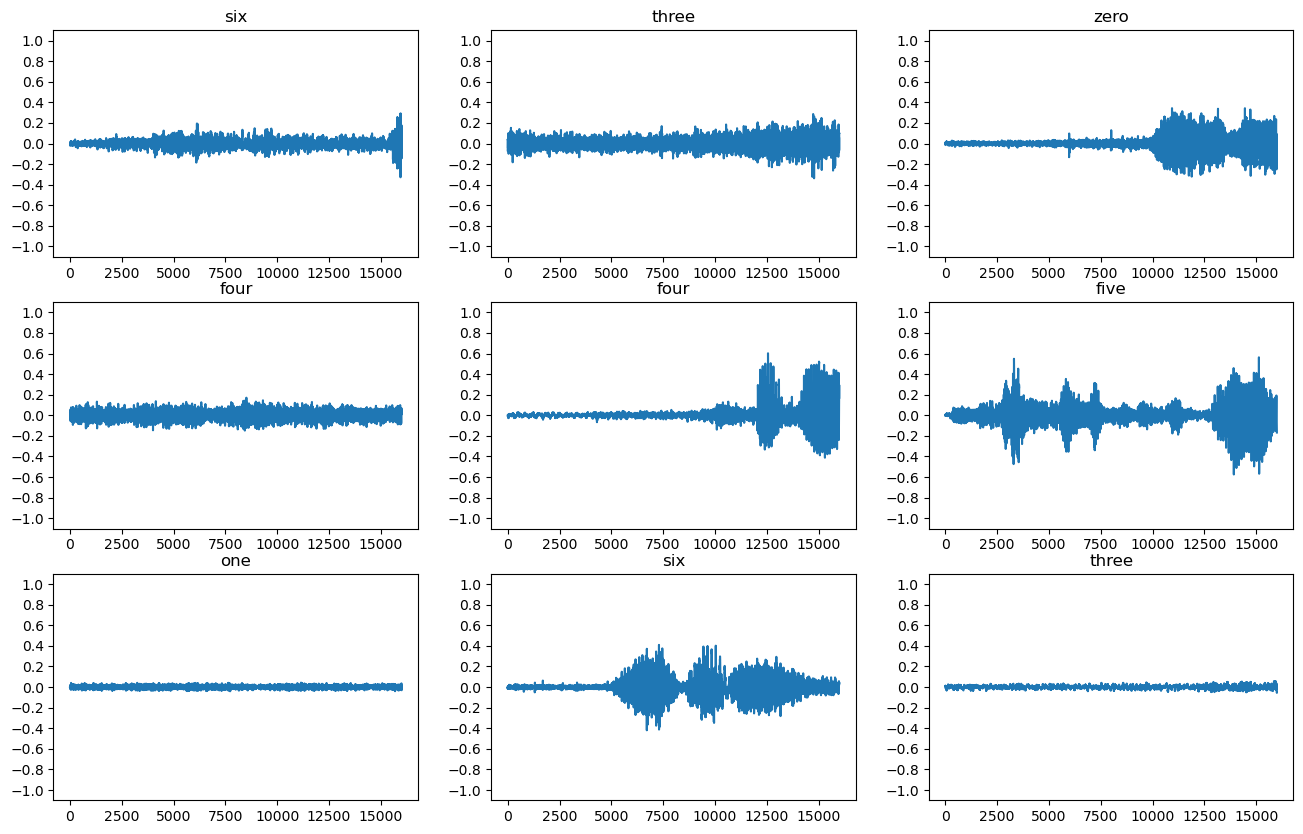

In [87]:
plt.figure(figsize=(16, 10))
rows = 3
cols = 3
n = rows * cols
for i in range(n):
  plt.subplot(rows, cols, i+1)
  audio_signal = example_audio[i]
  plt.plot(audio_signal)
  plt.title(label_names[example_labels[i]])
  plt.yticks(np.arange(-1.2, 1.2, 0.2))
  plt.ylim([-1.1, 1.1])

In [88]:
def get_spectrogram(waveform):
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

In [89]:
for i in range(3):
  label = label_names[example_labels[i]]
  waveform = example_audio[i]
  spectrogram = get_spectrogram(waveform)

  print('Label:', label)
  print('Waveform shape:', waveform.shape)
  print('Spectrogram shape:', spectrogram.shape)
  print('Audio playback')
  display.display(display.Audio(waveform, rate=16000))

Label: six
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


Label: three
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


Label: zero
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


In [90]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

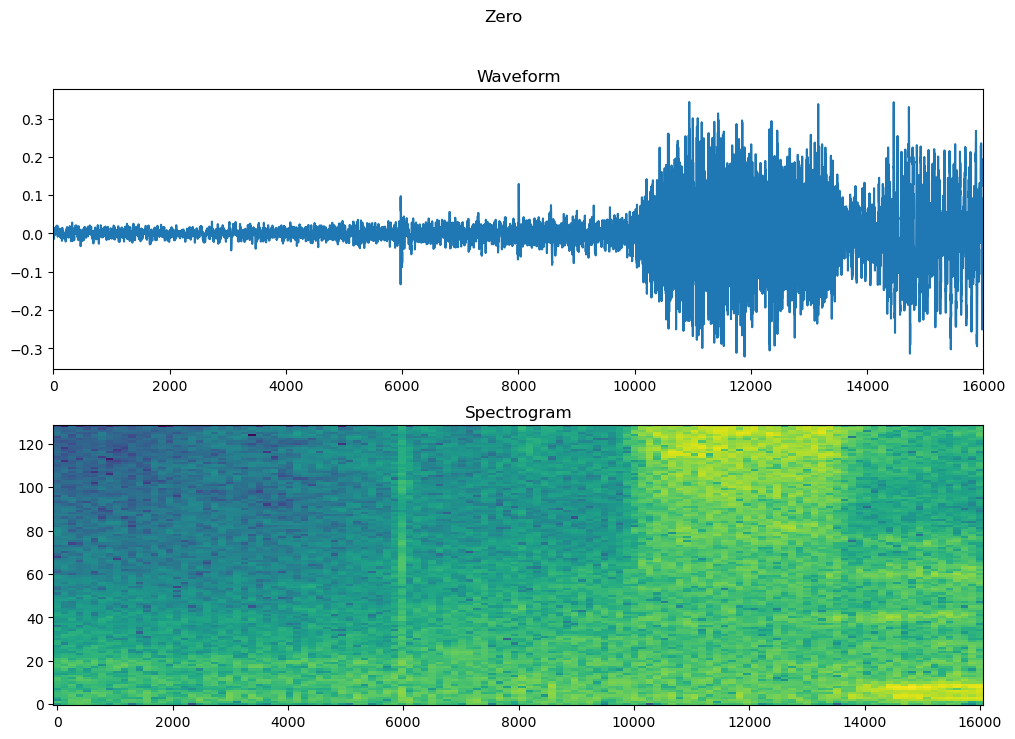

In [91]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.suptitle(label.title())
plt.show()

In [92]:
def make_spec_ds(ds):
  return ds.map(
      map_func=lambda audio,label: (get_spectrogram(audio), label),
      num_parallel_calls=tf.data.AUTOTUNE)

In [93]:
train_spectrogram_ds = make_spec_ds(train_ds)
val_spectrogram_ds = make_spec_ds(val_ds)
test_spectrogram_ds = make_spec_ds(test_ds)

In [94]:
for example_spectrograms, example_spect_labels in train_spectrogram_ds.take(1):
  break

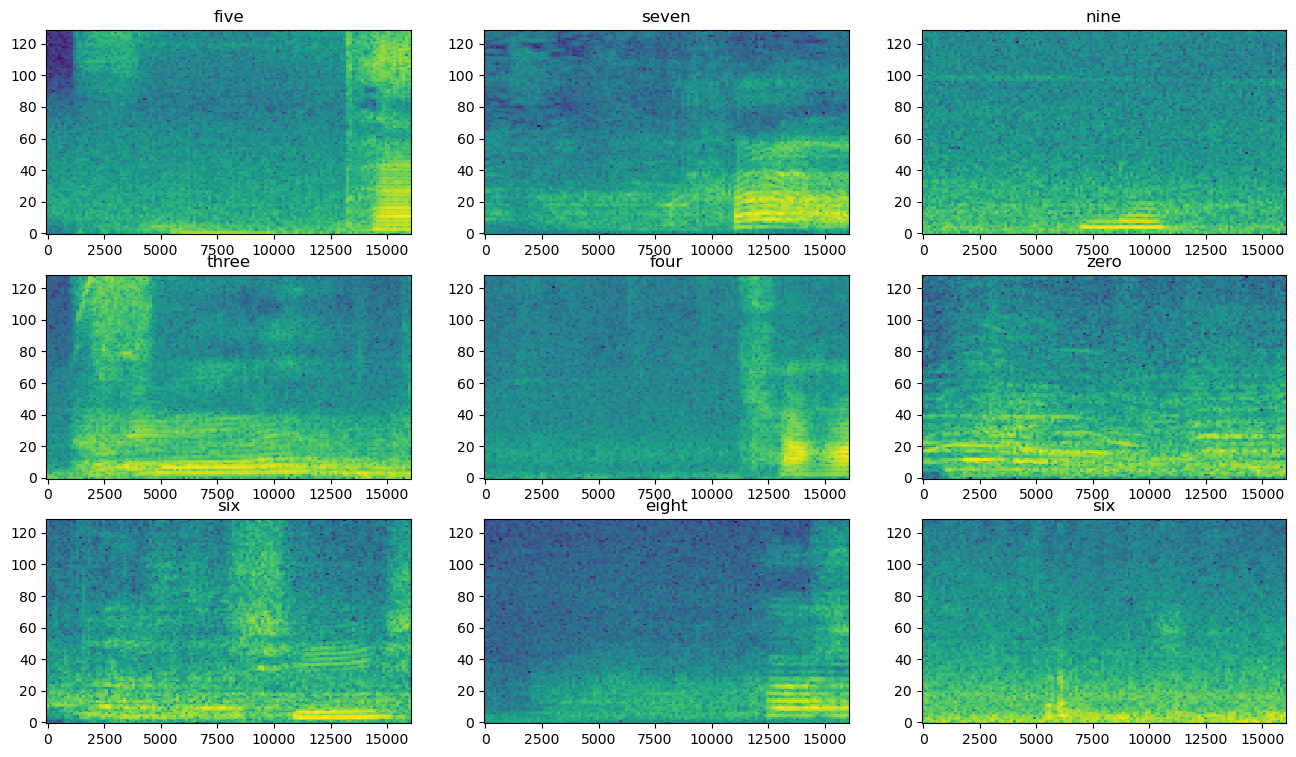

In [95]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(example_spectrograms[i].numpy(), ax)
    ax.set_title(label_names[example_spect_labels[i].numpy()])

plt.show()

In [96]:
train_spectrogram_ds = train_spectrogram_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_spectrogram_ds = val_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)
test_spectrogram_ds = test_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)

In [97]:
import os
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [98]:
# We have used two max pool with pool size and strides 2.
# Hence, downsampled feature maps are 16x smaller. The number of
# filters in the last layer is 128. Reshape accordingly before
# passing the output to the RNN part of the model

input_shape = example_spectrograms.shape[1:]
print('Input shape:', input_shape)
num_labels = len(label_names)
spect_width =124
spect_height=129


# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=train_spectrogram_ds.map(map_func=lambda spec, label: spec))
new_shape = (spect_width // 16, (spect_height // 16) * 256)

model=keras.models.Sequential([
                              layers.Input(shape=input_shape),#256
                              layers.Conv2D(32,(3, 3), activation="relu", padding="same"),
                              layers.MaxPooling2D((2, 2)),#128
                              layers.Conv2D(64,(3, 3), activation="relu", padding="same"),
                              layers.MaxPooling2D((2, 2)),#64
                              layers.Conv2D(128,(3, 3), activation="relu", padding="same"),
                              layers.MaxPooling2D((2, 2)),#32
                              layers.Conv2D(256,(3, 3), activation="relu", padding="same"),
                              layers.MaxPooling2D((2, 2)),#16
                              layers.Reshape(target_shape=new_shape),
                              layers.Dense(128, activation="relu"),
                              layers.Dropout(0.2),
                              layers.Conv1D(64, 3,activation="relu", padding="same"),
                              layers.MaxPool1D(2),
                              layers.Dropout(0.5),
                              layers.Flatten(), # Add a Flatten layer to collapse the sequence dimension
                              layers.Dense(num_labels, activation="softmax")
                              ])
model.summary()

Input shape: (124, 129, 1)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 124, 129, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 62, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 62, 64, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 31, 32, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 31, 32, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli

In [137]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Assuming the same input_shape and num_labels as before
input_shape = example_spectrograms.shape[1:]
num_labels = len(label_names)

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=train_spectrogram_ds.map(map_func=lambda spec, label: spec))

desired_sequence_length = 12544

model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    layers.Resizing(32, 32),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Reshape((-1, desired_sequence_length)),  # Reshape to the desired sequence length
    layers.TimeDistributed(layers.Dense(128, activation='relu')),
    layers.LSTM(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels, activation='softmax'),
])

model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_14 (Resizing)      (None, 32, 32, 1)         0         
                                                                 
 normalization_23 (Normaliz  (None, 32, 32, 1)         3         
 ation)                                                          
                                                                 
 conv2d_53 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 conv2d_54 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_38 (Dropout)        (None, 14, 14, 64)      

In [138]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [139]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [141]:
EPOCHS = 100
early_stopping_patience = 30
reduce_lr_patience=10

# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=early_stopping_patience, restore_best_weights=True
)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=reduce_lr_patience)

# Train the model
history = model.fit(
    train_spectrogram_ds,
    validation_data=val_spectrogram_ds,
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr],
)

Epoch 1/100
198/198 [==============================] - 11s 57ms/step - loss: 0.4772 - accuracy: 0.8362 - val_loss: 0.8241 - val_accuracy: 0.7668 - lr: 0.0010
Epoch 2/100
198/198 [==============================] - 11s 57ms/step - loss: 0.4279 - accuracy: 0.8538 - val_loss: 0.8960 - val_accuracy: 0.7532 - lr: 0.0010
Epoch 3/100
198/198 [==============================] - 13s 66ms/step - loss: 0.3971 - accuracy: 0.8672 - val_loss: 0.8876 - val_accuracy: 0.7616 - lr: 0.0010
Epoch 4/100
198/198 [==============================] - 13s 65ms/step - loss: 0.3761 - accuracy: 0.8701 - val_loss: 0.9178 - val_accuracy: 0.7706 - lr: 0.0010
Epoch 5/100
198/198 [==============================] - 12s 60ms/step - loss: 0.3361 - accuracy: 0.8890 - val_loss: 0.8718 - val_accuracy: 0.7758 - lr: 0.0010
Epoch 6/100
198/198 [==============================] - 12s 60ms/step - loss: 0.3043 - accuracy: 0.9006 - val_loss: 0.8762 - val_accuracy: 0.7822 - lr: 0.0010
Epoch 7/100
198/198 [==============================]

Text(0, 0.5, 'Accuracy [%]')

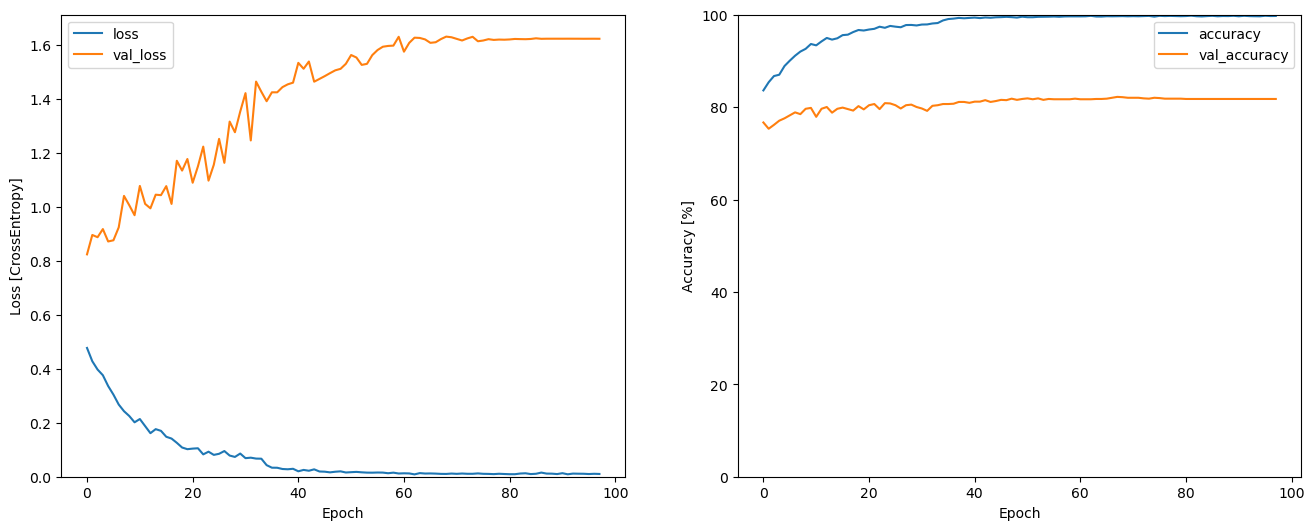

In [142]:
metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

In [143]:
model.evaluate(test_spectrogram_ds, return_dict=True)

25/25 [==============================] - 0s 16ms/step - loss: 1.4727 - accuracy: 0.8206


{'loss': 1.4727225303649902, 'accuracy': 0.8206250071525574}

In [144]:
y_pred = model.predict(test_spectrogram_ds)

25/25 [==============================] - 1s 14ms/step


In [145]:
y_pred = tf.argmax(y_pred, axis=1)

In [146]:
y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)

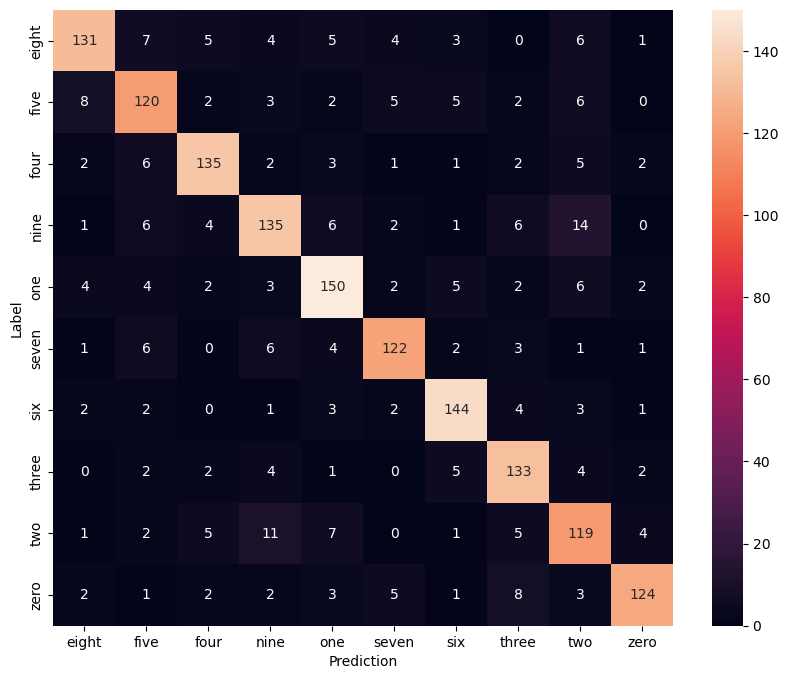

In [147]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [148]:
class ExportModel(tf.Module):
  def __init__(self, model):
    self.model = model

    # Accept either a string-filename or a batch of waveforms.
    # YOu could add additional signatures for a single wave, or a ragged-batch.
    self.__call__.get_concrete_function(
        x=tf.TensorSpec(shape=(), dtype=tf.string))
    self.__call__.get_concrete_function(
       x=tf.TensorSpec(shape=[None, 16000], dtype=tf.float32))


  @tf.function
  def __call__(self, x):
    # If they pass a string, load the file and decode it.
    if x.dtype == tf.string:
      x = tf.io.read_file(x)
      x, _ = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)
      x = tf.squeeze(x, axis=-1)
      x = x[tf.newaxis, :]

    x = get_spectrogram(x)
    result = self.model(x, training=False)

    class_ids = tf.argmax(result, axis=-1)
    class_names = tf.gather(label_names, class_ids)
    return {'predictions':result,
            'class_ids': class_ids,
            'class_names': class_names}

In [149]:
export = ExportModel(model)

In [150]:
tf.saved_model.save(export, "mini_modelsaved")
imported = tf.saved_model.load("mini_modelsaved")
imported(waveform[tf.newaxis, :])

INFO:tensorflow:Assets written to: mini_modelsaved\assets


INFO:tensorflow:Assets written to: mini_modelsaved\assets


{'class_ids': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([9], dtype=int64)>,
 'class_names': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'zero'], dtype=object)>,
 'predictions': <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
 array([[2.8291976e-23, 2.4077918e-26, 4.4409890e-19, 5.9329116e-20,
         1.1361952e-16, 4.9303069e-24, 6.2654897e-22, 1.2180092e-08,
         1.9820272e-23, 1.0000000e+00]], dtype=float32)>}